# Imports

In [21]:
from chesswar import Board
from player_models import *
from score_heuristics import *
import time
import matplotlib.pyplot as plt
import numpy as np

# Comparing Heuristics

In [8]:
players = [AlphaBetaPlayer, MinimaxPlayer]
heuristics = [open_move_score, improved_om_score, center_score, weighted_om_score]

In [14]:
average_runtimes = []
p1_win_stats = []
n_moves_stats = []

for player in players:
    player_runtimes = []
    win_stat = []
    moves_stat = []
    for heuristic in heuristics:
        print(f"Running {player.__name__} with {heuristic.__name__}")
        avg_time = 0
        p1_wins = 0
        avg_moves = 0
        for i in range(10):
            # print(f"        Running game {i+1}")
            start_time = time.time()
            player1 = player(score_fn=heuristic)
            player2 = RandomPlayer()
            game = Board(player1, player2, player_1_piece='queen', player_2_piece='queen')
            game.apply_move((0, 0))
            game.apply_move((6, 6))
            winner, history, outcome = game.play()
            if(winner == player1):
                p1_wins += 1
            avg_time += (time.time() - start_time) * 1000
            avg_moves += len(history)
        avg_time /= 10
        avg_moves /= 10
        player_runtimes.append(avg_time)
        win_stat.append(p1_wins)
        moves_stat.append(avg_moves)
    average_runtimes.append(player_runtimes)
    p1_win_stats.append(win_stat)
    n_moves_stats.append(moves_stat)

Running AlphaBetaPlayer with open_move_score
Running AlphaBetaPlayer with improved_om_score
Running AlphaBetaPlayer with center_score
Running AlphaBetaPlayer with weighted_om_score
Running MinimaxPlayer with open_move_score
Running MinimaxPlayer with improved_om_score
Running MinimaxPlayer with center_score
Running MinimaxPlayer with weighted_om_score


In [15]:
average_runtimes

[[560.5615615844727,
  1029.7634840011597,
  263.0671501159668,
  1215.5314445495605],
 [3556.0041427612305,
  6840.176367759705,
  2071.8964099884033,
  5466.7985916137695]]

In [16]:
p1_win_stats

[[7, 9, 8, 8], [10, 8, 6, 10]]

In [17]:
n_moves_stats

[[44.9, 43.9, 43.4, 45.0], [43.6, 45.4, 44.4, 44.2]]

### Plots

In [19]:
[f'{player.__name__}\n{heuristic.__name__}' for player in players for heuristic in heuristics]

['AlphaBetaPlayer\nopen_move_score',
 'AlphaBetaPlayer\nimproved_om_score',
 'AlphaBetaPlayer\ncenter_score',
 'AlphaBetaPlayer\nweighted_om_score',
 'MinimaxPlayer\nopen_move_score',
 'MinimaxPlayer\nimproved_om_score',
 'MinimaxPlayer\ncenter_score',
 'MinimaxPlayer\nweighted_om_score']

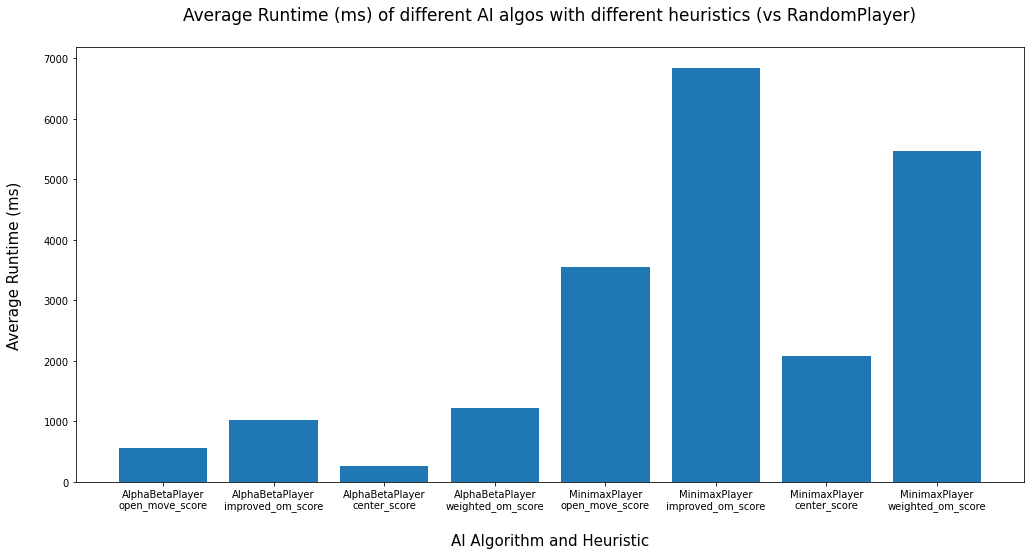

In [34]:
ypoints = np.array(average_runtimes[0]+average_runtimes[1]) 
xpoints = np.array([f'{player.__name__}\n{heuristic.__name__}' for player in players for heuristic in heuristics])

plt.figure(figsize=(17,8))
plt.bar(xpoints, ypoints)
plt.title("Average Runtime (ms) of different AI algos with different heuristics (vs RandomPlayer)\n", fontsize=17)
plt.ylabel("Average Runtime (ms)\n", fontsize=15)
plt.xlabel("\nAI Algorithm and Heuristic", fontsize=15)
plt.show()

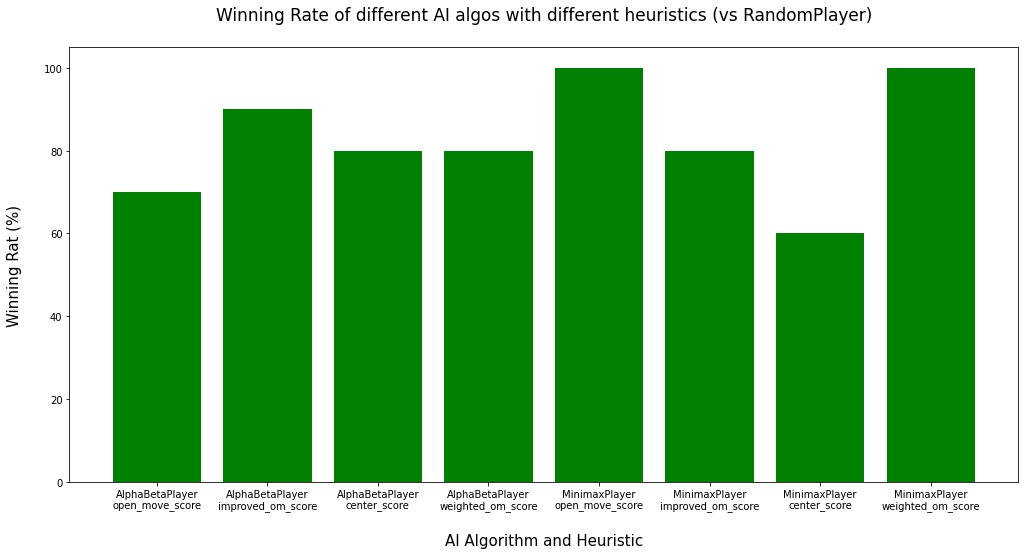

In [36]:
ypoints = np.array(p1_win_stats[0]+p1_win_stats[1])*10

plt.figure(figsize=(17,8))
plt.bar(xpoints, ypoints, color='green')
plt.title("Winning Rate of different AI algos with different heuristics (vs RandomPlayer)\n", fontsize=17)
plt.ylabel("Winning Rat (%)\n", fontsize=15)
plt.xlabel("\nAI Algorithm and Heuristic", fontsize=15)
plt.show()

# Bishop vs Knight

In [42]:
bk_wins = 0
for i in range(1000):
    player1 = AlphaBetaPlayer()
    player2 = AlphaBetaPlayer()
    game = Board(player1, player2, player_1_piece='bishop', player_2_piece='knight', height=8, width=8)
    game.apply_move((0, 0))
    game.apply_move((7, 7))
    winner, history, outcome = game.play()
    bk_wins += 1 if winner == player1 else 0

In [43]:
print('Winning Rate of Bishop against Knight : {}%'.format(bk_wins/10))

Winning Rate of Bishop against Knight : 29.8%
